<a href="https://colab.research.google.com/github/MaCroDmT/ARTIFICIAL-INTELLIGENCE-AND-EXPERT-SYSTEM/blob/main/I_21_45640_3_Week_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

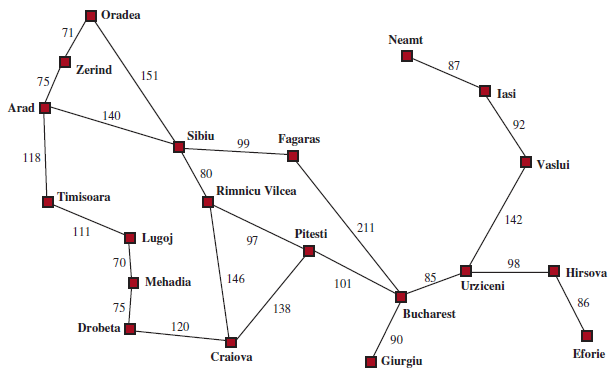

**Figure 3.1** A simplified road map of part of Romania, with road distances in miles.

In [ ]:
romanian_map = {
    'Arad': {'Sibiu':140, 'Timisoara':118,'Zerind':75},
    'Zerind': {'Arad':75, 'Oradea':71},
    'Oradea': {'Zerind':71, 'Sibiu': 151},
    'Sibiu': {'Arad':140, 'Oradea':151, 'Fagaras':99, 'Rimnicu':80},
    'Timisoara': {'Arad': 118, 'Lugoj':111},
    'Lugoj': {'Timisoara':111, 'Mehadia':70},
    'Mehadia': {'Lugoj': 70, 'Drobeta':75},
    'Drobeta': {'Mehadia':75, 'Craiova':120},
    'Craiova': {'Drobeta': 120, 'Rimnicu': 146, 'Pitesti': 138},
    'Rimnicu': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
    'Fagaras': {'Sibiu':99, 'Bucharest':211},
    'Pitesti': {'Rimnicu': 97, 'Craiova':138, 'Bucharest':101},
    'Bucharest': {'Fagaras':211, 'Pitesti': 101, 'Giurgiu':90, 'Urziceni':85},
    'Giurgiu': {'Bucharest': 90},
    'Urziceni': {'Bucharest': 85, 'Vaslui':142, 'Hirsova':98},
    'Hirsova': {'Urziceni':98, 'Eforie':86},
    'Eforie': {'Hirsova':86},
    'Vaslui': {'Iasi': 92, 'Urziceni':142},
    'Iasi': {'Vaslui':92, 'Neamt': 87},
    'Neamt': {'Iasi':87}
}

In [ ]:
romanian_map['Zerind']

{'Arad': 75, 'Oradea': 71}

In [ ]:
list(romanian_map['Arad'].keys())

['Sibiu', 'Zerind', 'Timisoara']

In [ ]:
romanian_map['Arad']['Zerind']

75

In [ ]:
romanian_map['Zerind']['Arad']

75

# BFS

<p style="text-align: justify">Reached is a set of states which has been generated, because once we’ve reached a state, we can never find a better path to the state. That also means we can do an early goal test, checking whether a node is a solution as soon as it is generated, rather than the late goal test that best-first search uses, waiting until a node is popped off the queue.</p>

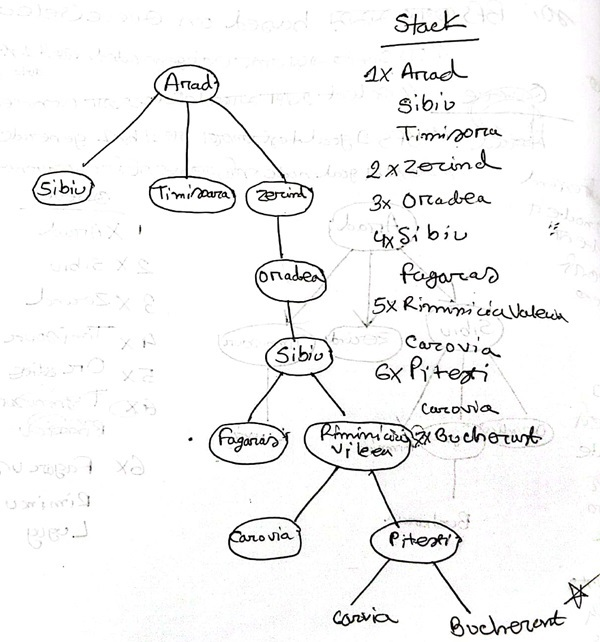

In [ ]:
def bfs(start, goal, G):
    generated= [start] # to store the order of nodes generated
    frontier = [{'Name':start,'Path cost':0, 'Path':[start]}]

    while len(frontier) > 0:
        print('***Frontier', end=': ')
        for node in frontier: print(node['Name'], end = ' - ')
        unode  = frontier.pop(0)     # selceting the node to expand
        u = unode['Name']

        print('***')
        print("Expanding: "+u)

        # expand u
        for v in G[u].keys(): # ['Sibiu', 'Zerind', 'Timisoara']
            if v not in generated: # process if v is not expanded yet
                generated.append(v)
                print(v+" generated.")
                cost = unode['Path cost'] + G[u][v]
                path =  unode['Path']+ [v]
                vnode = {'Name': v,'Path cost': cost,'Path': path}
                # goal test
                if v == goal:
                    print('Goal test satisfied.')
                    return vnode # breaking from while
                frontier.append(vnode)# store the generated node in the frontier

    print('Failed')

In [ ]:
bfs('Arad', 'Bucharest', romanian_map) # change the soure and destination

***Frontier: Arad - ***
Expanding: Arad
Sibiu generated.
Zerind generated.
Timisoara generated.
***Frontier: Sibiu - Zerind - Timisoara - ***
Expanding: Sibiu
Oradea generated.
Fagaras generated.
Rimnicu generated.
***Frontier: Zerind - Timisoara - Oradea - Fagaras - Rimnicu - ***
Expanding: Zerind
***Frontier: Timisoara - Oradea - Fagaras - Rimnicu - ***
Expanding: Timisoara
Lugoj generated.
***Frontier: Oradea - Fagaras - Rimnicu - Lugoj - ***
Expanding: Oradea
***Frontier: Fagaras - Rimnicu - Lugoj - ***
Expanding: Fagaras
Bucharest generated.
Goal test satisfied.


{'Name': 'Bucharest',
 'Path cost': 450,
 'Path': ['Arad', 'Sibiu', 'Fagaras', 'Bucharest']}

Based on the above BFS simulation, draw the search tree on paper and insert the image in this cell. (Double Click to edit this cell)

# DFS
Implement DFS using stack,
Implement stack using list (append and pop)

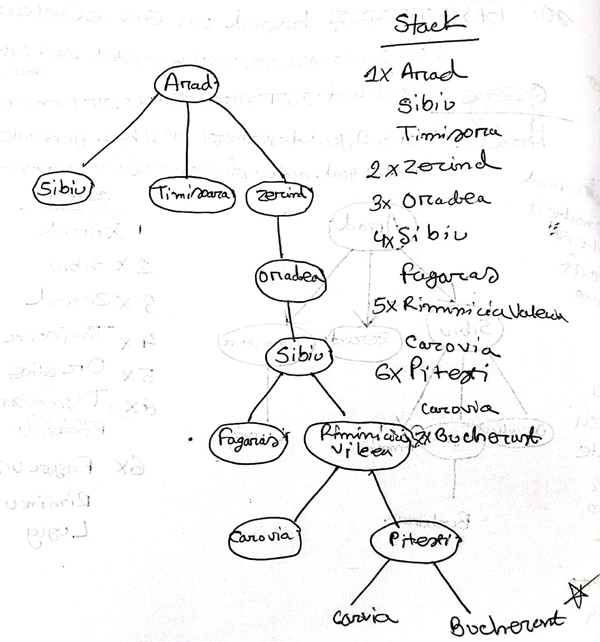

In [ ]:
def dfs(start, goal, G):
    expanded = [start]  # to store the order of nodes generated
    stack = [{'Name': start, 'Path cost': 0, 'Path': [start]}]  # stack for DFS

    while len(stack) > 0:
        print('***Stack', end=': ')
        for node in stack:
            print(node['Name'], end=' - ')
        unode = stack.pop()  # selecting the node to expand (using stack)
        u = unode['Name']

        print('***')
        print("Expanding: " + u)
        expanded.append(u)
        stack = []
        # expand u
        for v in G[u].keys():  # expand in the order of keys
            if v not in expanded:  # process if v is not expanded yet
                print(v + " generated.")
                if v == goal:
                    print('Goal test satisfied.')
                    return {'Name': v, 'Path cost': unode['Path cost'] + G[u][v], 'Path': unode['Path'] + [v]}
                cost = unode['Path cost'] + G[u][v]
                path = unode['Path'] + [v]
                vnode = {'Name': v, 'Path cost': cost, 'Path': path}
                stack.append(vnode)  # store the generated node in the stack

    print('Failed')

In [ ]:
# call DFS here for the Romanian map
# Testing the DFS function
start_node = 'Arad'
goal_node = 'Bucharest'
result = dfs(start_node, goal_node, romanian_map)
print("Result:", result)

***Stack: Arad - ***
Expanding: Arad
Sibiu generated.
Timisoara generated.
Zerind generated.
***Stack: Sibiu - Timisoara - Zerind - ***
Expanding: Zerind
Oradea generated.
***Stack: Oradea - ***
Expanding: Oradea
Sibiu generated.
***Stack: Sibiu - ***
Expanding: Sibiu
Fagaras generated.
Rimnicu generated.
***Stack: Fagaras - Rimnicu - ***
Expanding: Rimnicu
Craiova generated.
Pitesti generated.
***Stack: Craiova - Pitesti - ***
Expanding: Pitesti
Craiova generated.
Bucharest generated.
Goal test satisfied.
Result: {'Name': 'Bucharest', 'Path cost': 575, 'Path': ['Arad', 'Zerind', 'Oradea', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest']}


Based on the above DFS simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)

# Another Example

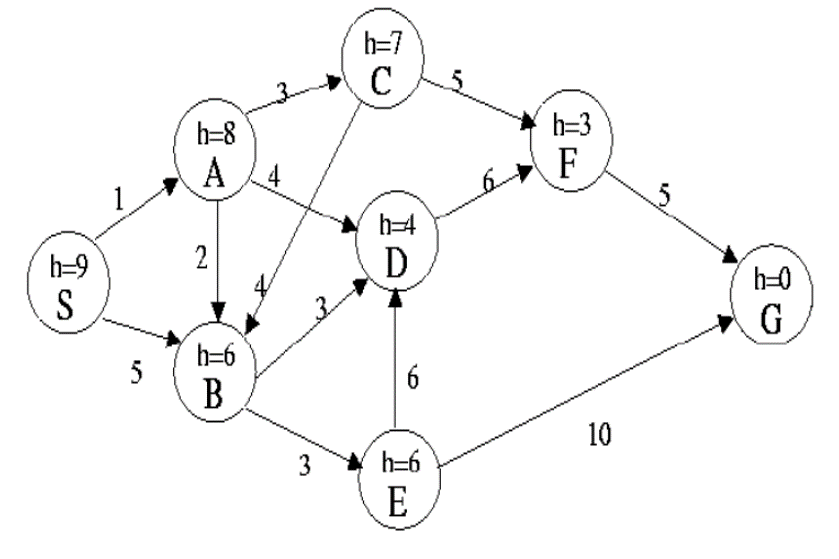

In the above graph the start state is **S**, and the goal state is **G**. The transition costs are next to the edges, and the heuristic estimate, h, of the distance from the state to the goal is in the state’s node.
<br>
Use **BFS** and  **DFS** for this graph.

In [ ]:
alphabetical_map = {
    'S': {'A':1, 'B':5,},
    'A': {'B':2, 'D':4,'C':3},
    'C': {'F':5, 'B':4},
    'F': {'G':5},
    'E': {'D': 6, 'G':10},
    'B': {'D':3, 'E':3},
    'D': {'F':6}
}

In [ ]:
def bfs(start, goal, G):
    generated= [start] # to store the order of nodes generated
    frontier = [{'Name':start,'Path cost':0, 'Path':[start]}]

    while len(frontier) > 0:
        print('***Frontier', end=': ')
        for node in frontier: print(node['Name'], end = ' - ')
        unode  = frontier.pop(0)     # selceting the node to expand
        u = unode['Name']

        print('***')
        print("Expanding: "+u)

        # expand u
        for v in G[u].keys(): # ['Sibiu', 'Zerind', 'Timisoara']
            if v not in generated: # process if v is not expanded yet
                generated.append(v)
                print(v+" generated.")
                cost = unode['Path cost'] + G[u][v]
                path =  unode['Path']+ [v]
                vnode = {'Name': v,'Path cost': cost,'Path': path}
                # goal test
                if v == goal:
                    print('Goal test satisfied.')
                    return vnode # breaking from while
                frontier.append(vnode)# store the generated node in the frontier

    print('Failed')

In [ ]:
bfs('S', 'G',alphabetical_map)

***Frontier: S - ***
Expanding: S
A generated.
B generated.
***Frontier: A - B - ***
Expanding: A
D generated.
C generated.
***Frontier: B - D - C - ***
Expanding: B
E generated.
***Frontier: D - C - E - ***
Expanding: D
F generated.
***Frontier: C - E - F - ***
Expanding: C
***Frontier: E - F - ***
Expanding: E
G generated.
Goal test satisfied.


{'Name': 'G', 'Path cost': 18, 'Path': ['S', 'B', 'E', 'G']}

Based on the above BFS simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)

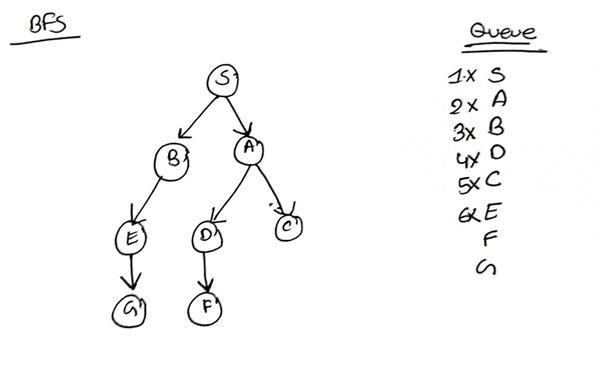

**DFS**

In [ ]:
# call DFS here for the above graph
def dfs(start, goal, G):
    expanded = [start]  # to store the order of nodes generated
    stack = [{'Name': start, 'Path cost': 0, 'Path': [start]}]  # stack for DFS

    while len(stack) > 0:
        print('***Stack', end=': ')
        for node in stack:
            print(node['Name'], end=' - ')
        unode = stack.pop()  # selecting the node to expand (using stack)
        u = unode['Name']

        print('***')
        print("Expanding: " + u)
        expanded.append(u)
        stack = []
        # expand u
        for v in G[u].keys():  # expand in the order of keys
            if v not in expanded:  # process if v is not expanded yet
                print(v + " generated.")
                if v == goal:
                    print('Goal test satisfied.')
                    return {'Name': v, 'Path cost': unode['Path cost'] + G[u][v], 'Path': unode['Path'] + [v]}
                cost = unode['Path cost'] + G[u][v]
                path = unode['Path'] + [v]
                vnode = {'Name': v, 'Path cost': cost, 'Path': path}
                stack.append(vnode)  # store the generated node in the stack

    print('Failed')

In [ ]:
dfs('S', 'G',alphabetical_map)

***Stack: S - ***
Expanding: S
A generated.
B generated.
***Stack: A - B - ***
Expanding: B
D generated.
E generated.
***Stack: D - E - ***
Expanding: E
D generated.
G generated.
Goal test satisfied.


{'Name': 'G', 'Path cost': 18, 'Path': ['S', 'B', 'E', 'G']}

Based on the above DFS simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)

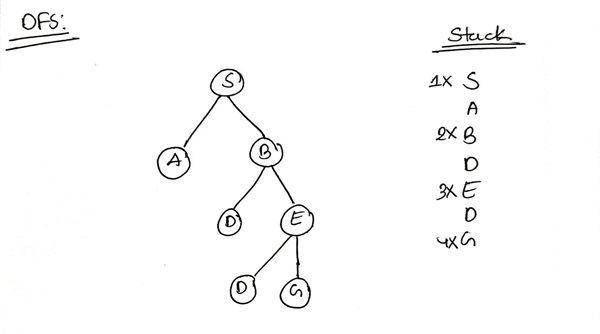


# New Exercise